<a href="https://colab.research.google.com/github/AlertaDengue/curso-pysus/blob/main/DATASUS/SINAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
# Interagindo com os dados do SINAN

O SINAN é o Sistema de Informação de Agravos de Notificação, que é alimentado pelos municípios e estados brasileiros. Os dados são disponibilizados pelo [DATASUS](http://www.datasus.gov.br).

In [27]:
from pysus.online_data import SINAN, FTP_Inspect, parquets_to_dataframe
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

O SINAN monitora apenas um pequeno conjunto de doenças, que são as doenças de notificação compulsória. Para saber quais estão disponíveis para acesso por meio do PySUS, usaremos o seguinte comando:

In [3]:
SINAN.list_diseases()

{'ACBI': 'Acidente de trabalho com material biológico',
 'ACGR': 'Acidente de trabalho',
 'ANIM': 'Acidente por Animais Peçonhentos',
 'ANTR': 'Atendimento Antirrabico',
 'BOTU': 'Botulismo',
 'CANC': 'Cancêr relacionado ao trabalho',
 'CHAG': 'Doença de Chagas Aguda',
 'CHIK': 'Febre de Chikungunya',
 'COLE': 'Cólera',
 'COQU': 'Coqueluche',
 'DENG': 'Dengue',
 'DERM': 'Dermatoses ocupacionais',
 'DIFT': 'Difteria',
 'ESQU': 'Esquistossomose',
 'EXAN': 'Doença exantemáticas',
 'FMAC': 'Febre Maculosa',
 'FTIF': 'Febre Tifóide',
 'HANS': 'Hanseníase',
 'HANT': 'Hantavirose',
 'HEPA': 'Hepatites Virais',
 'IEXO': 'Intoxicação Exógena',
 'INFL': 'Influenza Pandêmica',
 'LEIV': 'Leishmaniose Visceral',
 'LEPT': 'Leptospirose',
 'LERD': 'LER/Dort',
 'LTAN': 'Leishmaniose Tegumentar Americana',
 'MALA': 'Malária',
 'MENI': 'Meningite',
 'MENT': 'Transtornos mentais relacionados ao trabalho',
 'NTRA': 'Notificação de Tracoma',
 'PAIR': 'Perda auditiva por ruído relacionado ao trabalho',
 'PE

## Baixando os dados de certo agravo
O Módulos de datasets do PySUS todos possuem uma função download, que baixa os dados de um determinado agravo para um diretório local. Por exemplo, para baixar os dados de dengue, usamos o seguinte comando:

In [30]:
SINAN.download('Deng', years=2019)

100%|██████████| 110M/110M [00:00<00:00, 107GB/s]


/home/fccoelho/pysus/DENGBR19.parquet

Mas há uma API mais expressiva que também pode ser usada para baixar os dados.

In [10]:
from pysus.ftp.databases.sinan import SINAN
sinan = SINAN().load() # Loads the files from DATASUS

Com esta interface podemos inspecionar os dados disponíveis para download, antes de baixá-los.

In [14]:
arquivos = sinan.get_files(dis_code=["DENG", "ZIKA"], year=[2022, 2023])
arquivos

[DENGBR22.dbc, DENGBR23.dbc, ZIKABR22.dbc, ZIKABR23.dbc]

In [18]:
for arq in arquivos:
    print(sinan.describe(arq))


{'name': 'DENGBR22.dbc', 'disease': 'Dengue', 'year': 2022, 'size': '62.2 MB', 'last_update': '2023-08-21 03:20PM'}
{'name': 'DENGBR23.dbc', 'disease': 'Dengue', 'year': 2023, 'size': '62.9 MB', 'last_update': '2023-08-21 03:20PM'}
{'name': 'ZIKABR22.dbc', 'disease': 'Zika Vírus', 'year': 2022, 'size': '931.4 kB', 'last_update': '2023-08-23 10:10AM'}
{'name': 'ZIKABR23.dbc', 'disease': 'Zika Vírus', 'year': 2023, 'size': '384.1 kB', 'last_update': '2023-08-23 10:11AM'}


In [21]:
parquets = sinan.download(arquivos)
parquets

100%|██████████| 384k/384k [00:00<00:00, 1.39GB/s]


[/home/fccoelho/pysus/DENGBR22.parquet,
 /home/fccoelho/pysus/DENGBR23.parquet,
 /home/fccoelho/pysus/ZIKABR22.parquet,
 /home/fccoelho/pysus/ZIKABR23.parquet]

vamos carregar para a memória os dados de Zika

In [28]:
df = parquets[2].to_dataframe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35121 entries, 0 to 35120
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TP_NOT      35121 non-null  string
 1   ID_AGRAVO   35121 non-null  string
 2   DT_NOTIFIC  35121 non-null  object
 3   SEM_NOT     35121 non-null  string
 4   NU_ANO      35121 non-null  string
 5   SG_UF_NOT   35121 non-null  string
 6   ID_MUNICIP  35121 non-null  string
 7   ID_REGIONA  35121 non-null  string
 8   ID_UNIDADE  35121 non-null  string
 9   DT_SIN_PRI  35121 non-null  object
 10  SEM_PRI     35121 non-null  string
 11  ANO_NASC    35121 non-null  string
 12  NU_IDADE_N  35121 non-null  string
 13  CS_SEXO     35121 non-null  string
 14  CS_GESTANT  35121 non-null  string
 15  CS_RACA     35121 non-null  string
 16  CS_ESCOL_N  35121 non-null  string
 17  SG_UF       35121 non-null  string
 18  ID_MN_RESI  35121 non-null  string
 19  ID_RG_RESI  35121 non-null  string
 20  ID_PAI

Se quisermos combinar os dois anos de Zika que baixamos basta usar o seguinte comando:

In [36]:
df = pd.concat([parquets[2].to_dataframe(), parquets[3].to_dataframe()],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49964 entries, 0 to 14842
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TP_NOT      49964 non-null  string
 1   ID_AGRAVO   49964 non-null  string
 2   DT_NOTIFIC  49964 non-null  object
 3   SEM_NOT     49964 non-null  string
 4   NU_ANO      49964 non-null  string
 5   SG_UF_NOT   49964 non-null  string
 6   ID_MUNICIP  49964 non-null  string
 7   ID_REGIONA  49964 non-null  string
 8   ID_UNIDADE  49964 non-null  string
 9   DT_SIN_PRI  49964 non-null  object
 10  SEM_PRI     49964 non-null  string
 11  ANO_NASC    49964 non-null  string
 12  NU_IDADE_N  49964 non-null  string
 13  CS_SEXO     49964 non-null  string
 14  CS_GESTANT  49964 non-null  string
 15  CS_RACA     49964 non-null  string
 16  CS_ESCOL_N  49964 non-null  string
 17  SG_UF       49964 non-null  string
 18  ID_MN_RESI  49964 non-null  string
 19  ID_RG_RESI  49964 non-null  string
 20  ID_PAIS    

Podemos fazer uma visualização bem simples dos dados. Mas antes precisamos converter as colunas com datas para o tipo datetime.

In [37]:
for coluna in df.columns:
    if coluna.startswith('DT'):
        df[coluna] = pd.to_datetime(df[coluna], errors='coerce')

<Axes: xlabel='DT_NOTIFIC'>

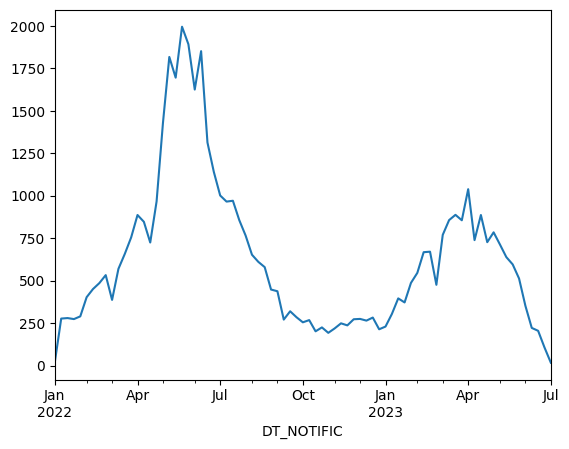

In [38]:
df.set_index('DT_NOTIFIC', inplace=True)
df.resample('W').count()['ID_AGRAVO'].plot();